In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sys
from numpy import load
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.models import Model
from tensorflow.keras import regularizers
from keras.applications.resnet50 import ResNet50, preprocess_input
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; 
 
# Importing sklearn libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
 
# Importing hypopt library for grid search
#from hypopt import GridSearch
 
# Importing Keras libraries
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D
 
import warnings
warnings.filterwarnings('ignore')

In [15]:
import glob
train = sorted(glob.glob('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/*.tif'))
train

['/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/0001img.tif',
 '/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/0002img.tif',
 '/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/0003img.tif',
 '/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/0004img.tif',
 '/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/0005img.tif',
 '/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/0006img.tif',
 '/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/0007img.tif',
 '/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/0008img.tif',
 '/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/0009img.tif',
 '/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/0010img.tif',
 '/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/0011img.tif',
 '/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/0012img.tif',
 '/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/0013img.tif',
 '/90days/s4

In [16]:
#train = [os.path.join("/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299",img) for img in os.listdir("/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299")]

model = ResNet50(weights="imagenet", include_top=False)
def create_features(dataset, pre_model):
 
    x_scratch = []

    for imagePath in dataset:
 
        image = load_img(imagePath, target_size=(290,290))
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
        x_scratch.append(image)
 
    x = np.vstack(x_scratch)
    features = pre_model.predict(x, batch_size=32)
    features_flatten = features.reshape((features.shape[0], 20 * 10 * 1024))
    return x, features, features_flatten

train_x, train_features, train_features_flatten = create_features(train, model)

In [19]:
import pandas as pd
import np_utils
import tensorflow as tf

train_features1 = train_features[:3000]
val_features1 = train_features[3000:]


df=pd.read_csv("/90days/s4634945/files/UntitledFolder/CNN_dataframe_gene_expression_3.csv")
y_train = df['Cluster']
y_train = tf.keras.utils.to_categorical(y_train, 3)
y_train1 = y_train[:3000,]
y_val = y_train[3000:,]

df_test=pd.read_csv("/90days/s4634945/files/UntitledFolder/CNN_dataframe_gene_expression_test_3.csv")
y_test = df_test['Cluster']
y_test = tf.keras.utils.to_categorical(y_test, 3)

In [28]:
'''model_scratch = Sequential()
model_scratch.add(Conv2D(32, (3, 3), activation='relu',input_shape = train_x.shape[1:]))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))
 
model_scratch.add(Conv2D(64, (3, 3), activation='relu'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))
 
model_scratch.add(Conv2D(64, (3, 3), activation='relu'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))
 
model_scratch.add(Conv2D(128, (3, 3), activation='relu'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))
 
model_scratch.add(GlobalAveragePooling2D())
model_scratch.add(Dense(64, activation='relu'))
model_scratch.add(Dense(3, activation='softmax'))'''


model_transfer = Sequential()
model_transfer.add(GlobalAveragePooling2D(input_shape=train_features.shape[1:]))
model_transfer.add(Dropout(0.5))
model_transfer.add(Dense(100, activation='relu'))
model_transfer.add(Dropout(0.5))
model_transfer.add(Dense(3, activation='softmax'))


model_transfer.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['AUC'])
history = model_transfer.fit(train_features1, y_train1, validation_data=(val_features1, y_val), batch_size=32, epochs=20,
          verbose=1, shuffle=True)
'''
model_scratch.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['AUC'])
 
#Fitting the model on the train data and labels.
history = model_scratch.fit(train_x, y_train,
          batch_size=32, epochs=10,
          verbose=1, shuffle=True)#callbacks=[checkpointer],validation_data=(val_x, y_val), '''

Epoch 1/20
94/94 [==============================] - 1s 10ms/step - loss: 1.2047 - auc: 0.6949 - val_loss: 0.9700 - val_auc: 0.7011
Epoch 2/20
94/94 [==============================] - 0s 4ms/step - loss: 0.6832 - auc: 0.8758 - val_loss: 0.9917 - val_auc: 0.7033
Epoch 3/20
94/94 [==============================] - 0s 4ms/step - loss: 0.5977 - auc: 0.9018 - val_loss: 0.8830 - val_auc: 0.7379
Epoch 4/20
94/94 [==============================] - 0s 4ms/step - loss: 0.5879 - auc: 0.9042 - val_loss: 0.8467 - val_auc: 0.7735
Epoch 5/20
94/94 [==============================] - 0s 4ms/step - loss: 0.5903 - auc: 0.9036 - val_loss: 0.8337 - val_auc: 0.7884
Epoch 6/20
94/94 [==============================] - 0s 4ms/step - loss: 0.5468 - auc: 0.9157 - val_loss: 0.8108 - val_auc: 0.7934
Epoch 7/20
94/94 [==============================] - 0s 4ms/step - loss: 0.5448 - auc: 0.9183 - val_loss: 0.8666 - val_auc: 0.7712
Epoch 8/20
94/94 [==============================] - 0s 4ms/step - loss: 0.5392 - auc: 0.9

"\nmodel_scratch.compile(loss='categorical_crossentropy', optimizer='adam',\n              metrics=['AUC'])\n \n#Fitting the model on the train data and labels.\nhistory = model_scratch.fit(train_x, y_train,\n          batch_size=32, epochs=10,\n          verbose=1, shuffle=True)#callbacks=[checkpointer],validation_data=(val_x, y_val), "

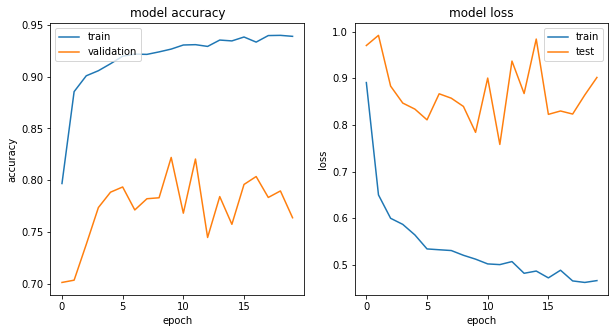

In [29]:
def plot_acc_loss(history):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['auc'])
    plt.plot(history.history['val_auc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
 
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

plot_acc_loss(history)

In [26]:
test = [os.path.join("/90days/s4634945/files/UntitledFolder/Trainimg_breast_test_299",img) for img in os.listdir("/90days/s4634945/files/UntitledFolder/Trainimg_breast_test_299")]

df_test=pd.read_csv("/90days/s4634945/files/UntitledFolder/CNN_dataframe_gene_expression_test_3.csv")
y_test = df_test['Cluster']
y_test = tf.keras.utils.to_categorical(y_test, 3)
len(test)

3987

In [27]:
test_x, test_features, test_features_flatten = create_features(test, model)

In [30]:
preds = np.argmax(model_transfer.predict(test_features), axis=1)
y_test = df_test['Cluster']
print("\nAccuracy on Test Data: ", accuracy_score(y_test, preds))
print("\nNumber of correctly identified imgaes: ",
      accuracy_score(y_test, preds, normalize=False),"\n")
confusion_matrix(y_test, preds)


Accuracy on Test Data:  0.3388512666165036

Number of correctly identified imgaes:  1351 



array([[188, 223, 919],
       [178, 258, 893],
       [192, 231, 905]])

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df=pd.read_csv("/90days/s4634945/files/UntitledFolder/CNN_dataframe_gene_expression_3.csv")
y_train = df['Cluster']

df_test=pd.read_csv("/90days/s4634945/files/UntitledFolder/CNN_dataframe_gene_expression_test_3.csv")
y_test = df_test['Cluster']

clf = lgb.LGBMClassifier()
clf.fit(train_features_flatten, y_train)
y_pred=clf.predict(test_features_flatten)
preds = np.argmax(model_transfer.predict(test_features_flatten), axis=1)
print("\nAccuracy on Test Data: ", accuracy_score(y_test, preds))